In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# opening the dataset provided in the notebook

c_app = pd.read_csv('application_data.csv')

# To make all the columns and rows visible

pd.set_option('display.max_columns', 130)

pd.set_option('display.max_rows', None)

# Retriving the Top 5 rows in the dataset

c_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Taking a master copy of dataset for duplicate valuations

c_app_master = c_app.copy()

In [5]:
# Check the number of rows and columns in the dataframe

c_app.shape

(307511, 122)

### Cleaning & Dealing with the missing values

In [6]:
# To check all the null values

c_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
# To check if the missing values are more than 50% in the entire column

nval_c = c_app.isnull().sum()
nval_c = nval_c[nval_c.values > (0.5* len(nval_c))]
len(nval_c)

64

#### The number of columns present in the dataset are with null values of above 50% :

- 64, which means that these colums might compromise the further analysis made on the dataset. So its better that we get rid of these cloumns right away!

In [8]:
# Dropping the columns with more than 50% missing values

nval_c= list(nval_c[nval_c>(0.5)].index)
c_app.drop(nval_c, axis = 1, inplace = True)

In [9]:
# To check the shape of the dataset after dropping the columns above

c_app.shape

(307511, 58)

In [10]:
# To check columns with a lesser null percentage

c_app.isnull().sum()/len(c_app)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [11]:
# To check the null vaules in the dataset after dropping the columns

c_app.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

#### The colunm named AMT_ANNUITY, CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE has quite a few null values still, so we will treat it according to their analysis value to the dataset :

- AMT_ANNUITY can be inputed with its median values.

- We can drop the other two columns (CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE ) along with a few others as they will not provide any further insight into main objective of the analysis.

In [12]:
# Inputing the AMT_ANNUITY column with its median values

c_app['AMT_ANNUITY'] = c_app['AMT_ANNUITY'].fillna(c_app['AMT_ANNUITY'].median())

# To check the null vaules in the dataset after inputing the null values in AMT_ANNUITY

c_app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [13]:
# To check for null values in rows with more than 50% of missing values

nval_r = c_app.isnull().sum(axis =1)
nval_r = nval_r[nval_r.values > (0.5* len(nval_r))]
len(nval_r)

0

#### The number of columns present in the dataset are with null values of above 50% :
- 0, hence we can keep the rows as it is and we do not need to drop or impute them.

In [14]:
# Drop the unnecessary column

del_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

c_app.drop(del_col, axis = 1, inplace = True)

In [15]:
# To check the shape after dropping the columns above

c_app.shape

(307511, 28)

In [16]:
# Check the null values again to make sure there aren't any 

c_app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int64

#### Now we need to check if the values inside the dataset has any NA values and impute/delete them accordingly
- There are 'XNA' values under a few columns, these are defined 'Not Available' values and have to be dealt with either by imputing or deleting them.

In [17]:
# To check the 'XNA' values in Gender column

c_app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### We can impute the 'XNA' values with 'F' as there are only 4 rows and will not affect the overall dataset

In [18]:
# Imputing the 'XNA' values with 'F'

c_app['CODE_GENDER'] = c_app['CODE_GENDER'].replace(['XNA'],'F')

# To check the updated values

c_app['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [19]:
# To check 'XNA' values in Organization column in terms of percentage

c_app['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

#### There are about 18% (55,374) 'XNA' values in the entire Organization column and imputing them might have an affect on the entire dataset however the 'XNA' values are still less than 30% of the entire column and thus can be deleted to keep the integrity of the dataset intact.

In [20]:
# Deleting the rows with 'XNA' values

c_app.drop(c_app.index[c_app['ORGANIZATION_TYPE'] == 'XNA'], inplace = True)

# To check the updated values

c_app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

#### Calculating Age, Years employed, Years registration, Years since the client changed his/her Id document at the time of application for easy computation

In [21]:
# calculate age with DAYS_BIRTH at the time of application

c_app['AGE'] = c_app['DAYS_BIRTH'].abs()/365.2425

In [22]:
# calculate years with DAYS_EMPLOYED at the time of application

c_app['YEARS_EMPLOYED'] = c_app['DAYS_EMPLOYED'].abs()/365.2425

In [23]:
# calculate change in years with DAYS_REGISTRATION at the time of application

c_app['YEARS_REGISTRATION'] = c_app['DAYS_REGISTRATION'].abs()/365.2425

In [24]:
# calculate years when client changed ID document with DAYS_ID_PUBLISH at the time of application

c_app['YEARS_ID_PUBLISH'] = c_app['DAYS_ID_PUBLISH'].abs()/365.2425

In [25]:
# drop the columns realted to days since the vaules are computed with years

del_col1 = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
c_app.drop(del_col1, axis = 1, inplace = True)

### Outliers values and thier Explaination
- We need to check few columns for outliers in our dataset. 
- Columns like CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY show that their max values are much more than the 75th percentile values. Hence we need to inspect thema nd make our observations

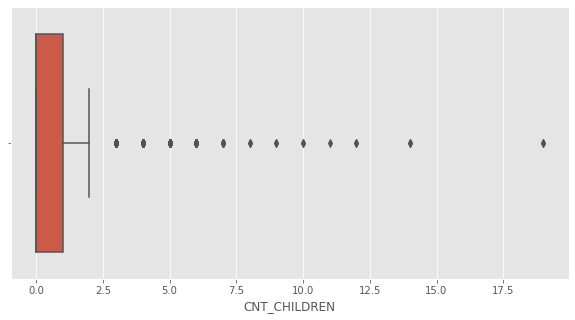

In [26]:
# To check Outliers in CNT_CHILDREN by box plotting

plt.figure(figsize=[10,5])
sns.boxplot(c_app['CNT_CHILDREN'])
plt.show()

- We can see that majority of the families have between 0-2 children however there are instances where there are upto 5 or more children as well.
- We can see that after 12 children there are just a couple of values that are truly acting out as anomalies in the dataset

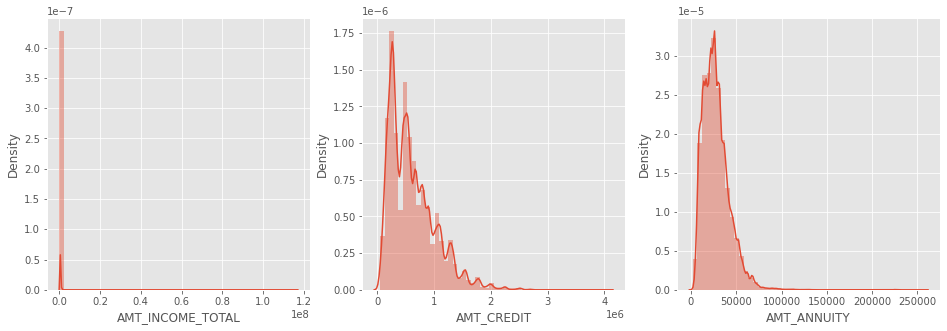

In [27]:
plt.figure(figsize = (16,5))
#sns.distplot(data['column'])

plt.subplot(1, 3, 1)
sns.distplot(c_app['AMT_INCOME_TOTAL'])

plt.subplot(1, 3, 2)
sns.distplot(c_app['AMT_CREDIT'])

plt.subplot(1, 3, 3)
sns.distplot(c_app['AMT_ANNUITY'])

plt.show()

- We can see that all the above 3 plots have multiple outliers and now we will check them individually

In [28]:
pd.options.display.float_format = "{:.2f}".format
c_app['AMT_INCOME_TOTAL'].describe()

count      252137.00
mean       175914.07
std        258851.59
min         25650.00
25%        112500.00
50%        157500.00
75%        211500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

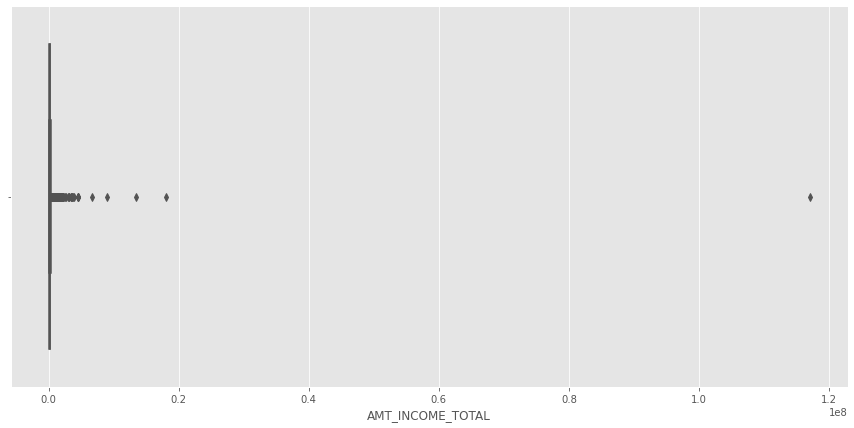

In [29]:
#Create a box plot for the AMT_INCOME_TOTAL column
plt.figure(figsize=[15,7])
sns.boxplot(c_app['AMT_INCOME_TOTAL'])
plt.show()

In [30]:
c_app.loc[c_app['AMT_INCOME_TOTAL'] == 117000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
12840,114967,1,Cash loans,F,N,Y,1,117000000.00,562491.00,26194.50,Working,Secondary / secondary special,Married,House / apartment,0.01,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,34.54,2.52,18.51,9.97


#### The max value of income - Outlier
- Income has an outlier value and this cannot be anomaly since there could be possibilities of client getting higher income
- Seems this client is regular in loan repayment

In [31]:
pd.options.display.float_format = "{:.2f}".format
c_app['AMT_CREDIT'].describe()

count    252137.00
mean     611398.46
std      406527.20
min       45000.00
25%      277969.50
50%      521280.00
75%      829224.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

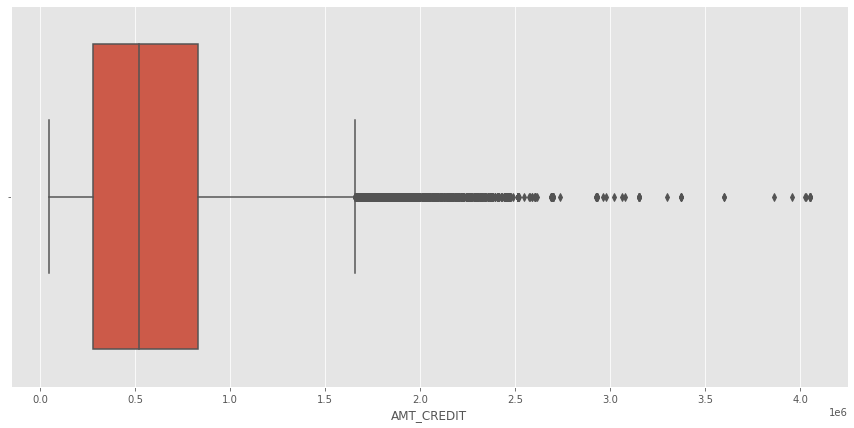

In [32]:
#Create a box plot for the AMT_CREDIT column
plt.figure(figsize=[15,7])
sns.boxplot(c_app['AMT_CREDIT'])
plt.show()

In [33]:
c_app.loc[c_app['AMT_CREDIT'] == 4050000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
14852,117337,0,Cash loans,M,N,Y,1,760846.50,4050000.00,146002.50,Commercial associate,Higher education,Married,Office apartment,0.07,WEDNESDAY,14,0,0,0,0,0,0,Trade: type 7,35.03,3.76,9.74,12.72
17948,120926,0,Cash loans,M,Y,N,2,783000.00,4050000.00,258025.50,Commercial associate,Higher education,Married,House / apartment,0.01,THURSDAY,14,1,1,0,1,1,1,Industry: type 4,41.55,0.55,4.19,12.93
110459,228135,0,Cash loans,M,N,N,2,864900.00,4050000.00,102384.00,Commercial associate,Higher education,Married,House / apartment,0.03,THURSDAY,8,0,0,0,0,0,0,Business Entity Type 3,40.90,1.73,3.48,3.46
119681,238782,0,Cash loans,M,Y,Y,1,931365.00,4050000.00,102514.50,Commercial associate,Higher education,Married,House / apartment,0.03,MONDAY,14,0,0,0,0,1,1,Transport: type 4,34.32,1.86,5.09,12.60
120757,240007,0,Cash loans,M,N,N,0,587250.00,4050000.00,106969.50,Commercial associate,Higher education,Married,House / apartment,0.05,THURSDAY,20,0,1,1,0,1,1,Industry: type 1,54.47,1.15,27.45,9.05
133766,255139,0,Cash loans,F,Y,N,1,1307587.50,4050000.00,100197.00,Commercial associate,Higher education,Married,House / apartment,0.07,SATURDAY,16,0,0,0,0,0,0,Trade: type 2,42.30,0.69,7.47,3.65
287732,433294,0,Cash loans,F,Y,N,1,405000.00,4050000.00,102514.50,Commercial associate,Higher education,Married,House / apartment,0.04,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,31.09,1.17,0.12,2.90
288455,434170,0,Cash loans,F,Y,N,1,450000.00,4050000.00,106839.00,Commercial associate,Higher education,Civil marriage,House / apartment,0.04,TUESDAY,11,0,0,0,0,0,0,Business Entity Type 3,45.47,8.33,0.34,0.37


#### The max value of credit - Outliers
- Credit has outlier values and this cannot be anomaly since there is possibility of clients getting higher loan credit for medium range of income annual.
- Seems to be these clients are regular in loan repayment

In [34]:
pd.options.display.float_format = "{:.2f}".format
c_app['AMT_ANNUITY'].describe()

count   252137.00
mean     27812.19
std      14647.42
min       1980.00
25%      17073.00
50%      25834.50
75%      35617.50
max     258025.50
Name: AMT_ANNUITY, dtype: float64

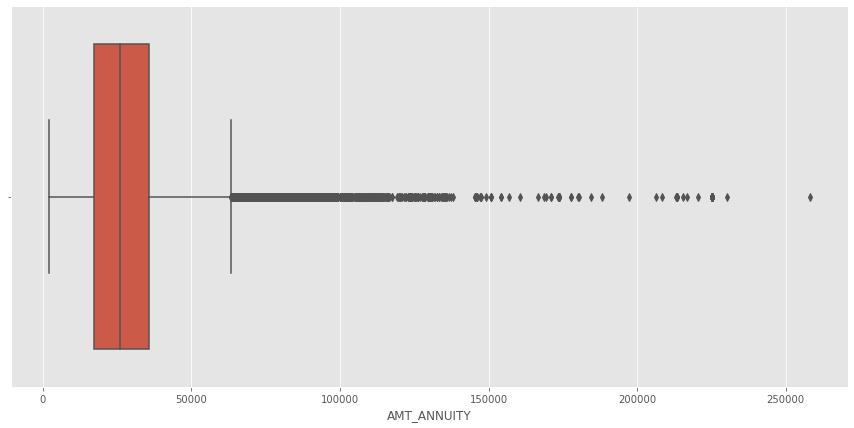

In [35]:
#Create a box plot for the AMT_ANNUITY column
plt.figure(figsize=[15,7])
sns.boxplot(c_app['AMT_ANNUITY'])
plt.show()

In [36]:
c_app.loc[c_app['AMT_ANNUITY'] == 258025.50]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
17948,120926,0,Cash loans,M,Y,N,2,783000.00,4050000.00,258025.50,Commercial associate,Higher education,Married,House / apartment,0.01,THURSDAY,14,1,1,0,1,1,1,Industry: type 4,41.55,0.55,4.19,12.93


#### The max value of annuity - Outliers
- Annuity has outlier value and there can be possibility that the client can pay annuity of higher range with higher credit value
- Seems this client is regular in loan repayment

#### Binning of Income, Credit and Annuity columns for Univariate and Bivariate analysis

In [37]:
#Income bin

c_app['INCOME_BIN'] = pd.qcut(c_app['AMT_INCOME_TOTAL'], q=9, precision=0, duplicates='drop')

In [38]:
#Credit bin

c_app['CREDIT_BIN'] = pd.qcut(c_app['AMT_CREDIT'], q=9, precision=0, duplicates='drop')

In [39]:
#Annuity bin

c_app['ANNUITY_BIN'] = pd.qcut(c_app['AMT_ANNUITY'], q=9, precision=0, duplicates='drop')

In [40]:
# To check the final shape(rows & columns) of the given dataset after cleaning the data

c_app.shape

(252137, 31)

In [41]:
# Take a peek at the final dataset to be used after cleaning

c_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,INCOME_BIN,CREDIT_BIN,ANNUITY_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,25.90,1.74,9.99,5.80,"(180000.0, 225000.0]","(348264.0, 469152.0]","(23962.0, 27225.0]"
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,State servant,Higher education,Married,House / apartment,0.00,MONDAY,11,0,0,0,0,0,0,School,45.90,3.25,3.25,0.80,"(225000.0, 270000.0]","(1125000.0, 4050000.0]","(31522.0, 36864.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,MONDAY,9,0,0,0,0,0,0,Government,52.15,0.62,11.66,6.93,"(25649.0, 90000.0]","(44999.0, 198666.0]","(1979.0, 11871.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52.03,8.32,26.92,6.67,"(112500.0, 135000.0]","(270000.0, 348264.0]","(27225.0, 31522.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,THURSDAY,11,0,0,0,0,1,1,Religion,54.57,8.32,11.80,9.47,"(112500.0, 135000.0]","(469152.0, 562491.0]","(20250.0, 23962.0]"


In [42]:
# To check the variables in Target column

c_app['TARGET'].value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

In [43]:
# we are going to divide the c_app into 2 parts

# part1: client application with payment difficulties
# part2: client application with regular payment

In [44]:
c_app_default = c_app[c_app['TARGET']== 1] # client application with payment difficulties
c_app_regular = c_app[c_app['TARGET']== 0] # client applciation with regular payment

### Imbalance Ratio
- Target 0 is the majority and Target 1 is the minority.

In [45]:
# To check the Imbalance Ratio

round(len(c_app_regular)/len(c_app_default),2)

10.55

#### The Imbalance Ratio between the Target variable is 10.55

### Data Analysis

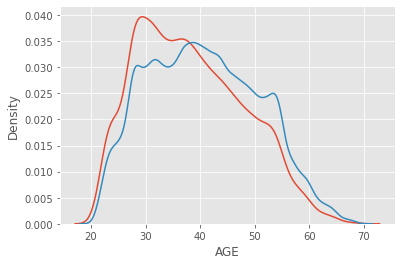

In [46]:
# Univariate - Continous for different age group in both defaulters and regulars

sns.distplot(c_app_default['AGE'],label='Defaulters',hist=False)
sns.distplot(c_app_regular['AGE'],label='Regulars',hist=False)

#### Age group of both defaulters and regulars has a uniform distibution and maximum range of age ranging from 25 to 55

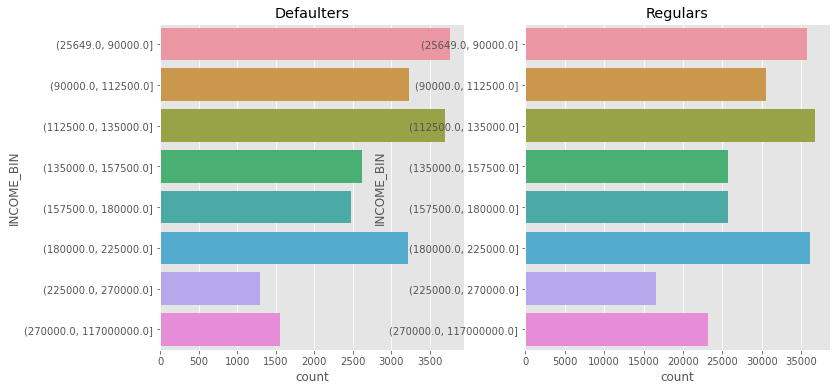

In [47]:
# Univariate - categorical for income range of both defaulters and regulars

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='INCOME_BIN',data=c_app_default)

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='INCOME_BIN',data=c_app_regular)

#### Income range of defaulters seems to be lesser when compared with regulars, however count of regular people are higher

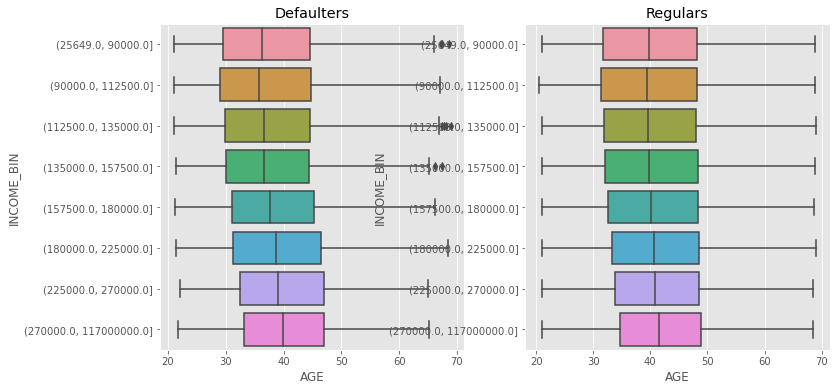

In [50]:
#Bivariate - count of categorical for income range with comparision to age group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='AGE',y='INCOME_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='AGE',y='INCOME_BIN',data=c_app_regular)

#### Boxplot Range of Income bin with age
- 25th and 75th percentile ranging of defaulters ranging 35-48 and regulars 35-50 whereas median of defaulter are seemigly ranging less than or equal to 40, regulars median ranging above 40
- Defaulters has some outlier values where as regulars are having uniform age distibution

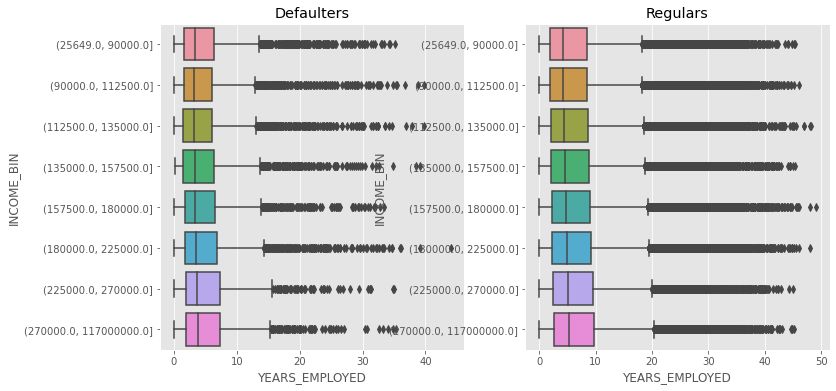

In [51]:
#Bivariate - count of categorical for income range with comparision to years employed group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_EMPLOYED',y='INCOME_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_EMPLOYED',y='INCOME_BIN',data=c_app_regular)

#### Boxplot Range of Income bin with years employed - Outliers
- Outliers range in defaulters starts with 13 years whereas regulars starts with 20 years

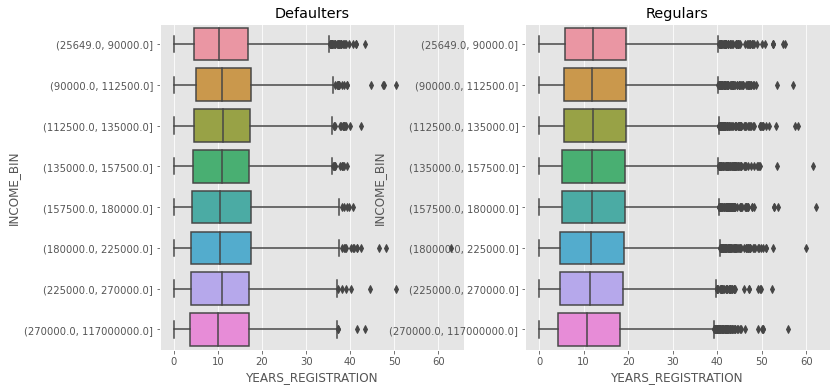

In [52]:
#Bivariate - count of categorical for income range with client's years registerd group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_REGISTRATION',y='INCOME_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_REGISTRATION',y='INCOME_BIN',data=c_app_regular)

#### Boxplot Range of Income bin with years registered - Outliers
- Outliers range in defaulters starts with 13 years whereas regulars starts with 20 years of registered client's

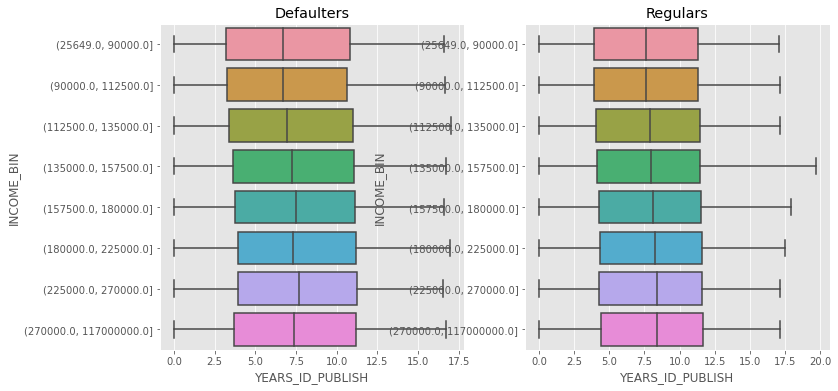

In [53]:
#Bivariate - count of categorical for income range with client's change in ID group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_ID_PUBLISH',y='INCOME_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_ID_PUBLISH',y='INCOME_BIN',data=c_app_regular)

#### Boxplot Range of Income bin with years changed ID of client
- median of defaulters starts with 7.5 years whereas regulars are more than 7.5 with median value after the client has changed his ID during the time of application

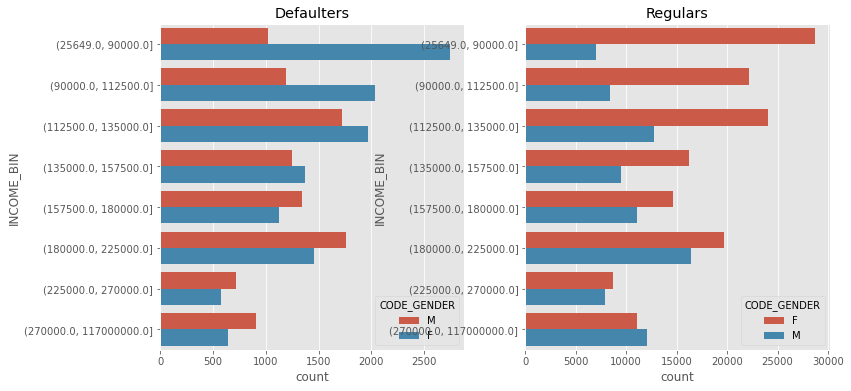

In [54]:
# Univariate - categorical of income range of both defaulters and regulars with hue gender category

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='INCOME_BIN',hue='CODE_GENDER',data=c_app_default)

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='INCOME_BIN',hue='CODE_GENDER',data=c_app_regular)

#### Gender range of defaulters vs. regulars with Income
- No of Female clients tops the income range when compared with male in both defaulters as well as regulars group, however the salary range of male defaulters increases gradually when compared with female defaulter clients

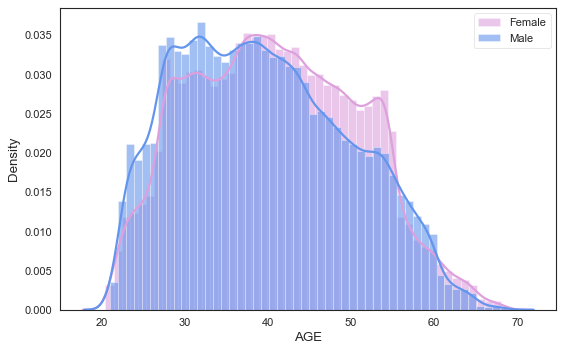

In [55]:
#distibution of clients age with gender

sns.set_style("white")

x1 = c_app.loc[c_app.CODE_GENDER=='F', 'AGE']
x2 = c_app.loc[c_app.CODE_GENDER=='M', 'AGE']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(x1, color="plum", label="Female", **kwargs)
sns.distplot(x2, color="cornflowerblue", label="Male", **kwargs)
plt.legend()

#### Age group of both male and female has a uniform distibution and maximum range of age ranging from 28 to 54

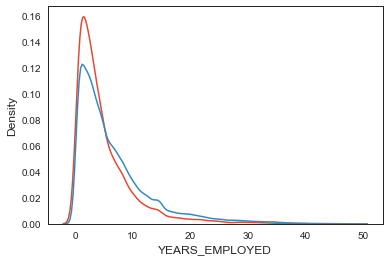

In [56]:
# Univariate - Continous for years of employment in both defaulters and regulars

sns.distplot(c_app_default['YEARS_EMPLOYED'],label='Defaulters',hist=False)
sns.distplot(c_app_regular['YEARS_EMPLOYED'],label='Regulars',hist=False)

#### Years employed of both defaulters and regulars has a non-uniform distibution and maximum range of years ranging from 0 to 10
- There are possibilities of people who are (Students) apply for loan for education

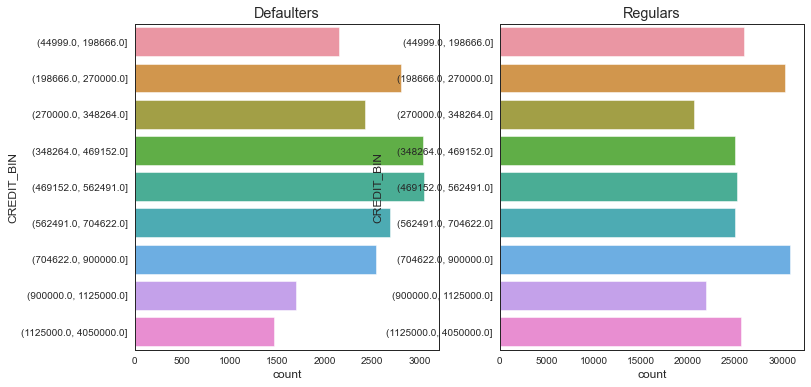

In [57]:
# Univariate - categorical for loan credit range of both defaulters and regulars

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='CREDIT_BIN',data=c_app_default)

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='CREDIT_BIN',data=c_app_regular)

#### Credit range 350000 - 560000 of defaulters seems to be higher whereas regulars with higher credit range of 700000 - 900000 tops, where count of regular people are higher than the defaulters

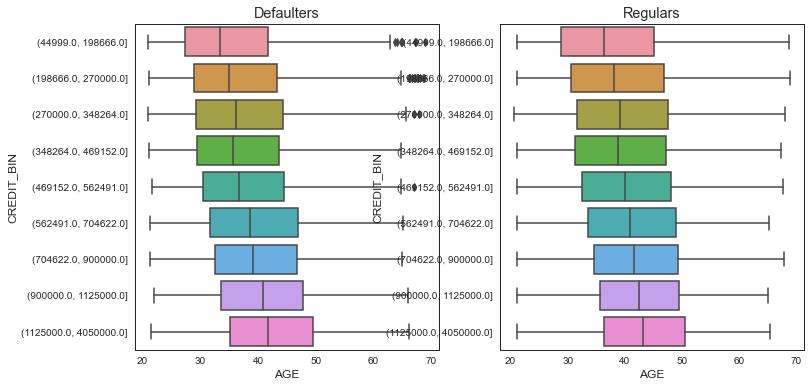

In [58]:
#Bivariate - count of categorical for loan credit range with comparision to age group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='AGE',y='CREDIT_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='AGE',y='CREDIT_BIN',data=c_app_regular)

#### Boxplot Range of Credit bin with age
- 25th and 75th percentile ranging of defaulters ranging 35-50 and regulars 38-50 whereas median of defaulter are seemigly ranging in 35-40, regulars median ranging 40 and above
- Defaulters has some outlier values where as regulars are having uniform age distibution

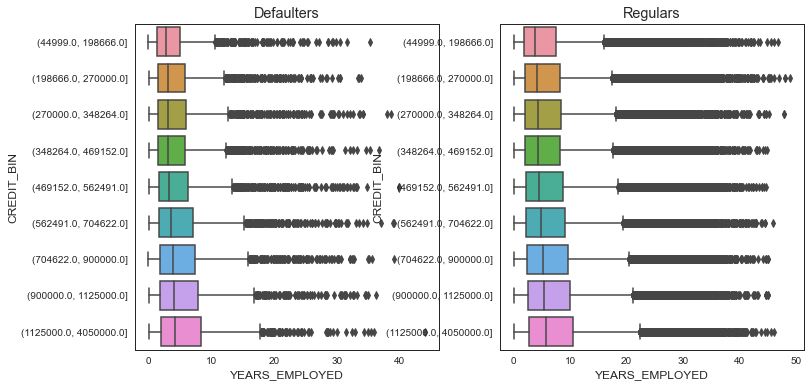

In [59]:
#Bivariate - count of. categorical for loan credit range with comparision to years employed group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_EMPLOYED',y='CREDIT_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_EMPLOYED',y='CREDIT_BIN',data=c_app_regular)

#### Boxplot Range of Credit bin with years employed - Outliers
- Outliers range in defaulters starts with 11 years whereas regulars starts with 20 years

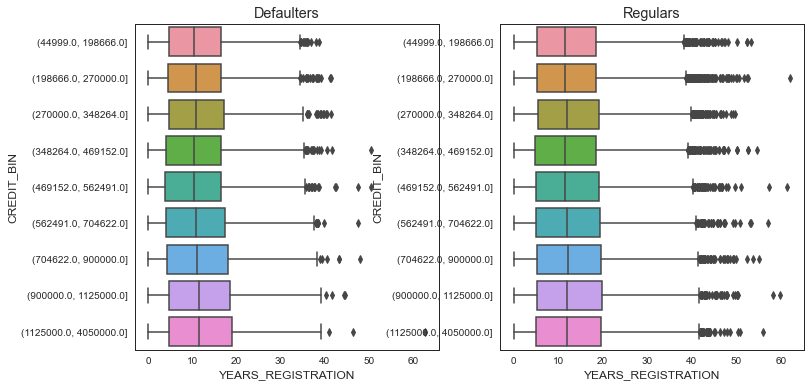

In [60]:
#Bivariate - count of categorical for loan credit range with client's years registerd group
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_REGISTRATION',y='CREDIT_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_REGISTRATION',y='CREDIT_BIN',data=c_app_regular)

#### Boxplot Range of Credit bin with years registered - Outliers
- Outliers range in defaulters starts with 35 years whereas regulars starts with 40 years of registered client's

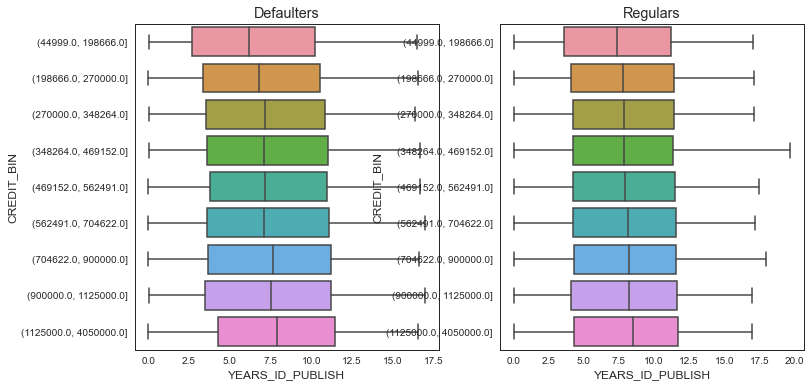

In [61]:
#Bivariate - count of categorical for loan credit range with client's change in ID group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_ID_PUBLISH',y='CREDIT_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_ID_PUBLISH',y='CREDIT_BIN',data=c_app_regular)

#### Boxplot Range of Credit bin with years changed ID of client
- median of defaulters starts with 7.5 years whereas regulars are more than 7.5 with median value after the client has changed his ID during the time of application

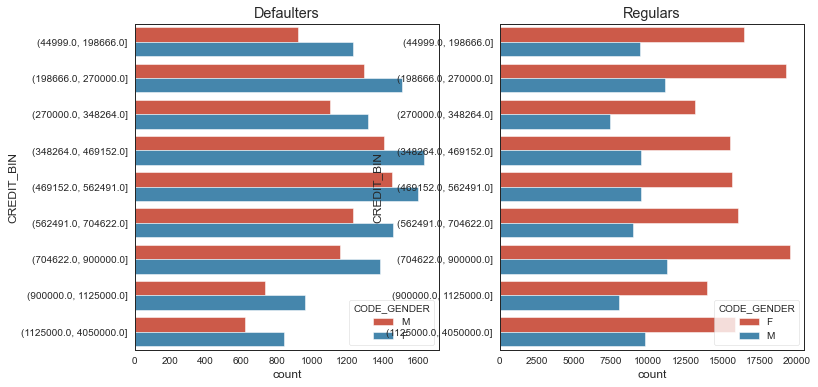

In [62]:
# Univariate - categorical for loan credit range of both defaulters and regulars with hue gender category

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='CREDIT_BIN',hue='CODE_GENDER',data=c_app_default)

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='CREDIT_BIN',hue='CODE_GENDER',data=c_app_regular)

#### Gender range of defaulters vs. regulars with Credit
- No of Female clients tops the credit range when compared with male in both defaulters as well as regulars group, however there is major difference in regular group of female and male category where female regular clients are higher in ratio than the male regular clients

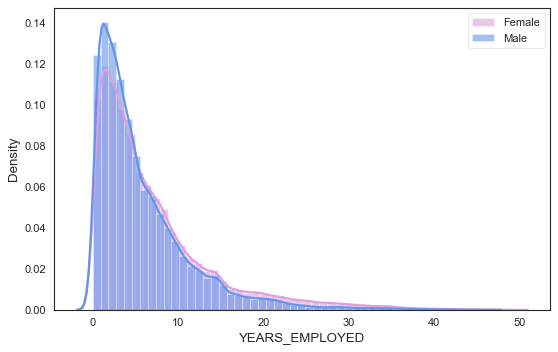

In [63]:
#distibution of clients years of employment with gender

sns.set_style("white")

x1 = c_app.loc[c_app.CODE_GENDER=='F', 'YEARS_EMPLOYED']
x2 = c_app.loc[c_app.CODE_GENDER=='M', 'YEARS_EMPLOYED']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(x1, color="plum", label="Female", **kwargs)
sns.distplot(x2, color="cornflowerblue", label="Male", **kwargs)
plt.legend()

#### Years employed of both male and female has a non-uniform distibution and maximum range of years ranging from 0 to 10
- There are possibilities of people who are (Students) apply for loan for education

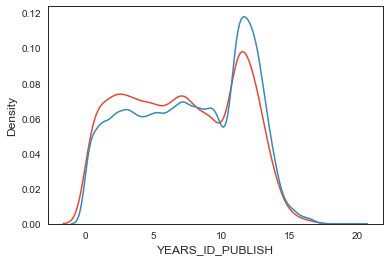

In [64]:
# Univariate - Continous for clients who changed IDs years before application in both defaulters and regulars

sns.distplot(c_app_default['YEARS_ID_PUBLISH'],label='Defaulters',hist=False)
sns.distplot(c_app_regular['YEARS_ID_PUBLISH'],label='Regulars',hist=False)

#### Year of change in client ID of both defaulters and regulars has a non-uniform distibution and maximum range of years ranging from 10 to 15

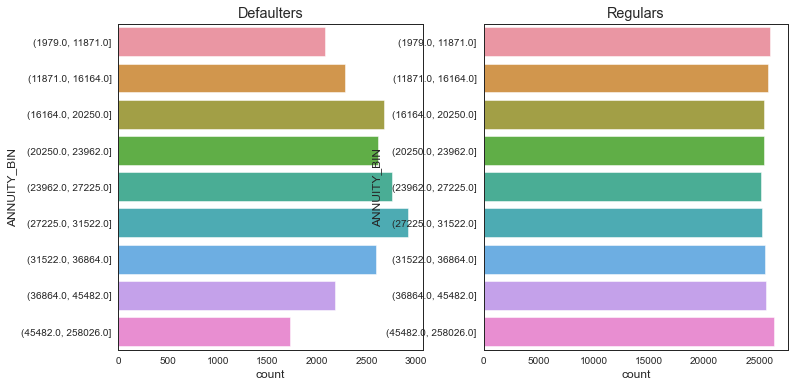

In [65]:
# Univariate - categorical for loan annuity range of both defaulters and regulars

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='ANNUITY_BIN',data=c_app_default)

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='ANNUITY_BIN',data=c_app_regular)

#### Annuity range 27000 - 31000 of defaulters seems to be higher whereas regulars has almost same frequency of annuity range with count of regular people higher than the defaulters

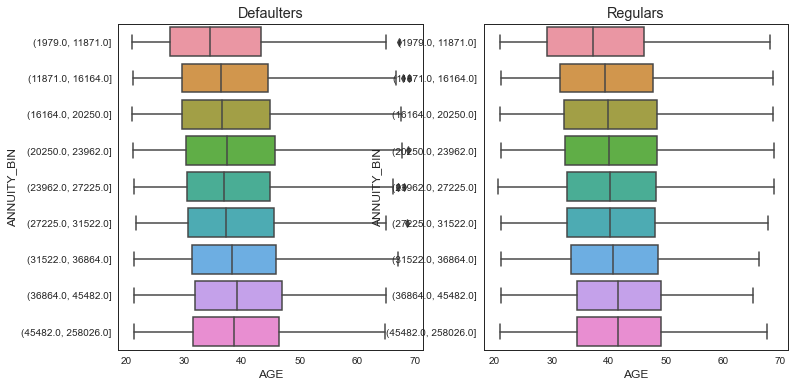

In [66]:
#Bivariate - count vs. categorical for loan annuity range with comparision to age group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='AGE',y='ANNUITY_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='AGE',y='ANNUITY_BIN',data=c_app_regular)

#### Boxplot Range of Annuity bin with age
- 25th and 75th percentile ranging of defaulters ranging 31-46 and regulars 33-50 whereas median of defaulter are seemigly ranging in 35-40, regulars median ranging 40 and above
- Defaulters has some outlier values where as regulars are having uniform age distibution

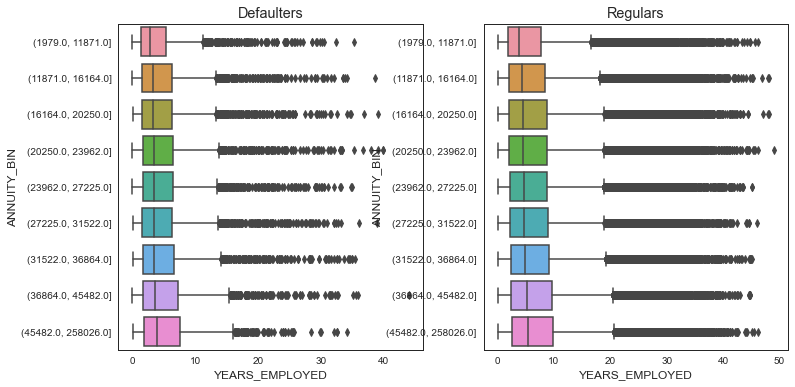

In [67]:
#Bivariate - count vs. categorical for loan annuity range with comparision to years employed group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_EMPLOYED',y='ANNUITY_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_EMPLOYED',y='ANNUITY_BIN',data=c_app_regular)

#### Boxplot Range of Annuity bin with years employed - Outliers
- Outliers range in defaulters starts with 13 years whereas regulars starts with 20 years

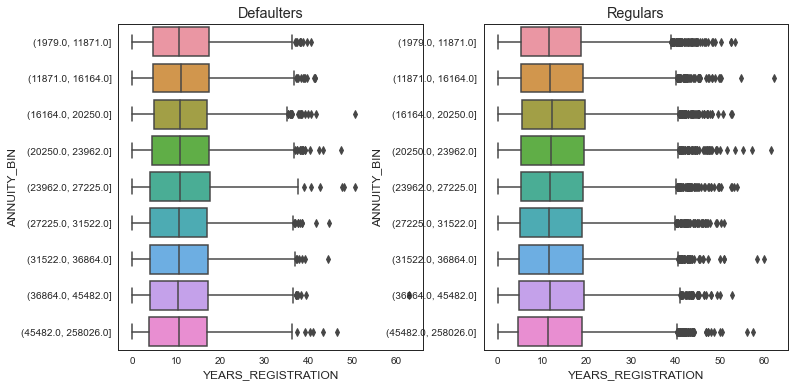

In [68]:
#Bivariate - count vs. categorical for loan annuity range with client's years registerd group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_REGISTRATION',y='ANNUITY_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_REGISTRATION',y='ANNUITY_BIN',data=c_app_regular)

#### Boxplot Range of Annuity bin with years registered - Outliers
- Outliers range in defaulters starts with 35 years whereas regulars starts with 40 years of registered client's

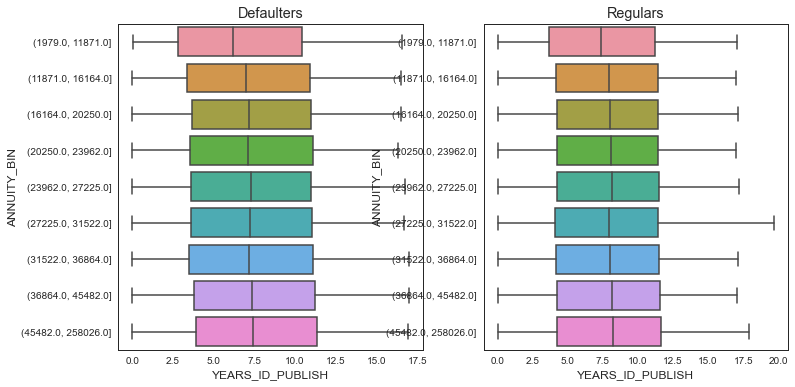

In [69]:
#Bivariate - count vs. categorical for loan credit range with client's change in ID group

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='YEARS_ID_PUBLISH',y='ANNUITY_BIN',data=c_app_default)


plt.subplot(1,2,2)
plt.title('Regulars')
sns.boxplot(x='YEARS_ID_PUBLISH',y='ANNUITY_BIN',data=c_app_regular)

#### Boxplot Range of Annuity bin with years changed ID of client
- median of defaulters starts with 7.5 years whereas regulars are more than 7.5 with median value after the client has changed his ID during the time of application

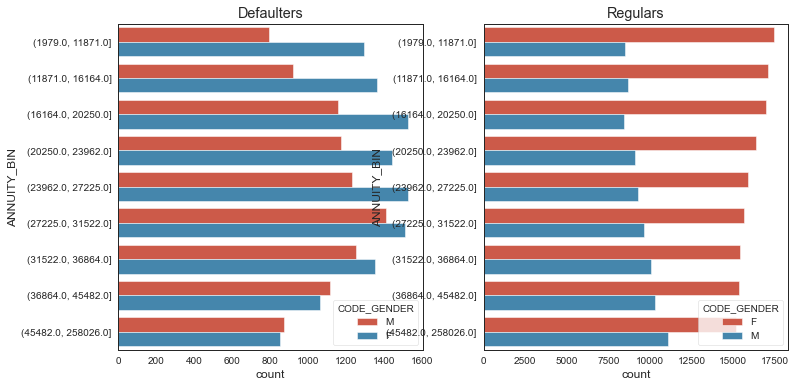

In [70]:
# Univariate - categorical for loan annuity range of both defaulters and regulars with hue gender category

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='ANNUITY_BIN',hue='CODE_GENDER',data=c_app_default)

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='ANNUITY_BIN',hue='CODE_GENDER',data=c_app_regular)

#### Gender range of defaulters vs. regulars with Annuity
- No of Female clients tops the annuity range when compared with male in both defaulters as well as regulars group, however there is major difference in regular group of female and male category where female regular clients are higher in ratio than the male regular clients

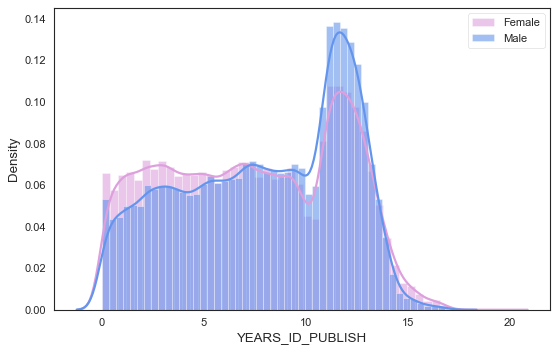

In [71]:
#distibution of clients who changed IDs years before application with gender

sns.set_style("white")

x1 = c_app.loc[c_app.CODE_GENDER=='F', 'YEARS_ID_PUBLISH']
x2 = c_app.loc[c_app.CODE_GENDER=='M', 'YEARS_ID_PUBLISH']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(x1, color="plum", label="Female", **kwargs)
sns.distplot(x2, color="cornflowerblue", label="Male", **kwargs)
plt.legend()

#### Year of change in client ID of both male and female has a non-uniform distibution and maximum range of years ranging from 10 to 15

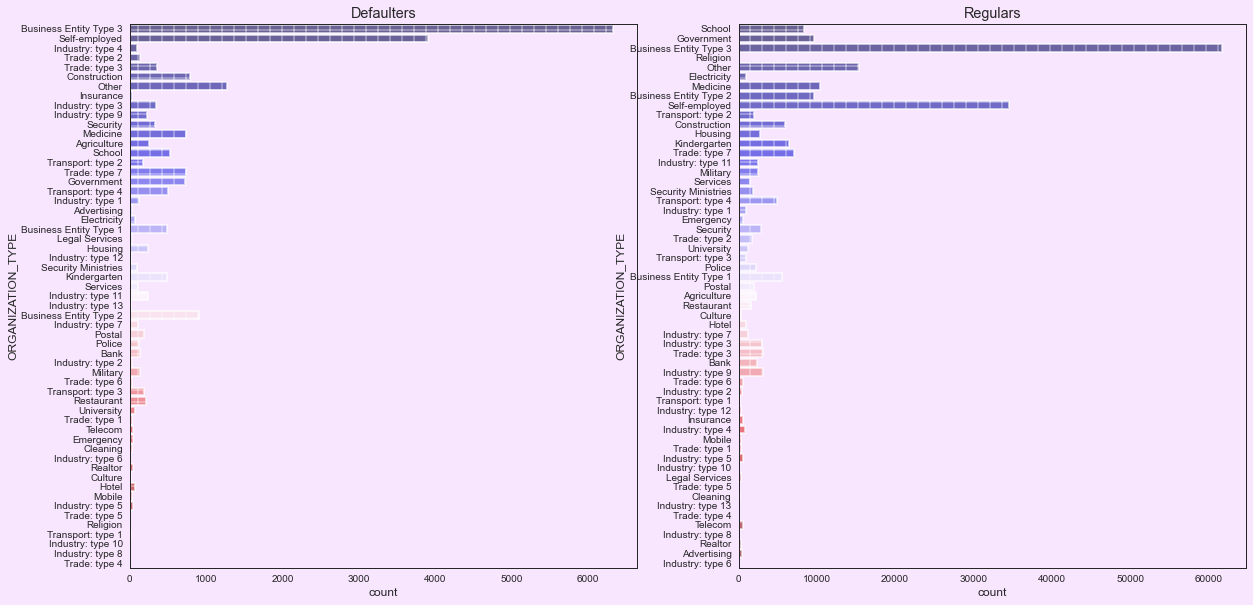

In [72]:
# Univariate - categorical for organization type of both defaulters and regulars
plt.rcParams['figure.facecolor'] = "#f8e6ff"
plt.rcParams['axes.facecolor'] = "#f8e6ff"

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='ORGANIZATION_TYPE',data=c_app_default,palette='seismic',**{'hatch':'+','alpha':0.6,'linewidth':2})

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='ORGANIZATION_TYPE',data=c_app_regular,palette='seismic',**{'hatch':'+','alpha':0.6,'linewidth':2})


#### ORGANIZATION_TYPE tops with values of Business Entiry Type 3 and Self-employed in both the categories Defaulters and Regulars
- Most of the client's who are doing business or making small scale investments are in need of loan and this inference clearly shows the same.

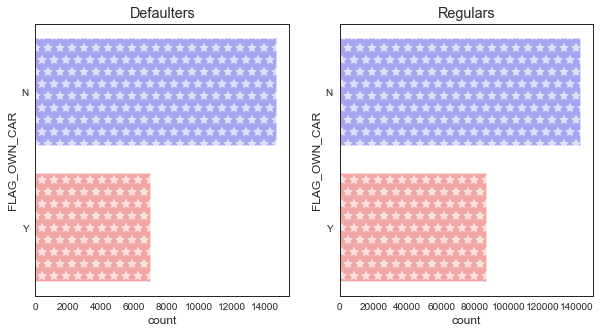

In [73]:
# Univariate - categorical for clients with own car of both defaulters and regulars
plt.rcParams['figure.facecolor'] = "#ffffff"
plt.rcParams['axes.facecolor'] = "#ffffff"

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='FLAG_OWN_CAR',data=c_app_default,palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='FLAG_OWN_CAR',data=c_app_regular,palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})

#### In both Defaulters and Regulars the clients who own a car are most likely to earn well and the Defaulter count is less than Regulars count

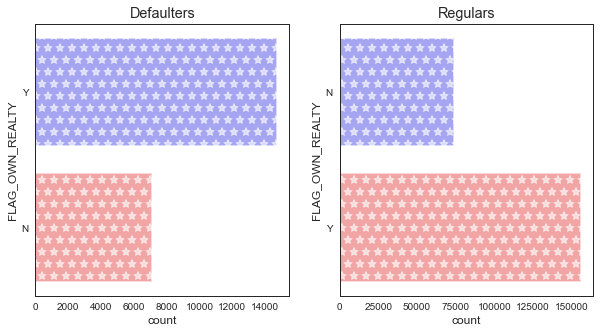

In [74]:
# Univariate - categorical for clients with own house or flat of both defaulters and regulars
plt.rcParams['figure.facecolor'] = "#ffffff"
plt.rcParams['axes.facecolor'] = "#ffffff"

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='FLAG_OWN_REALTY',data=c_app_default,palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='FLAG_OWN_REALTY',data=c_app_regular,palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})

#### In Regulars the clients who own an appartment/flat are most likely to earn well and they fall under the category of Regulars due to the documents of REALTY they would have submitted during loan application also Regulars are majority in numbers
- This major inference makes a clarity that if any client ready to produce/pledge document related to their realty they can be granted loan

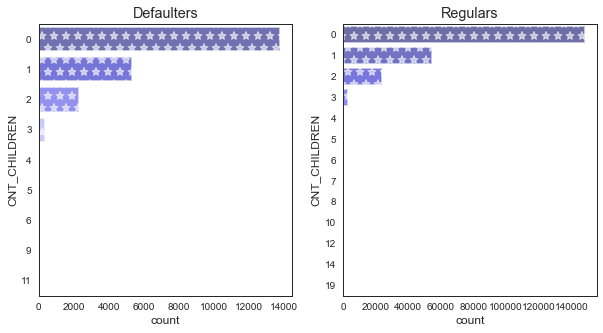

In [75]:
# Univariate - categorical for clients with children count of both defaulters and regulars
plt.rcParams['figure.facecolor'] = "#ffffff"
plt.rcParams['axes.facecolor'] = "#ffffff"

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(y='CNT_CHILDREN',data=c_app_default,palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})

plt.subplot(1,2,2)
plt.title('Regulars')
sns.countplot(y='CNT_CHILDREN',data=c_app_regular,palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})

#### There isn't much difference in childern count of both the defaulter and regular list

In [76]:
# Segregate the defaulters and regulars from the income range

c_income_top10_default = c_app_default.nlargest(10,['AMT_INCOME_TOTAL']) # client application with payment difficulties
c_income_top10_regular = c_app_regular.nlargest(10,['AMT_INCOME_TOTAL']) # client applciation with regular payment

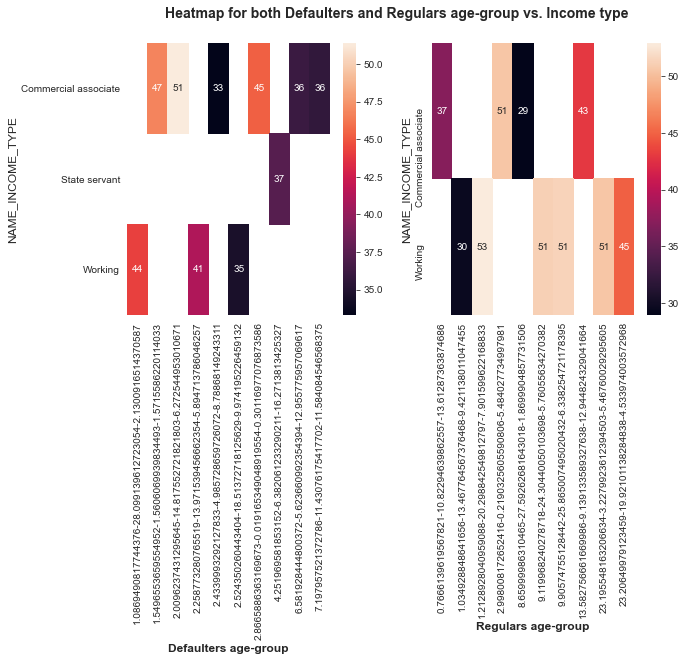

In [77]:
#pivot for top 10 defaulters income range with their income type
age_default_income=pd.pivot_table(data=c_income_top10_default, index='NAME_INCOME_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

#pivot for top 10 regulars income range with their income type
age_regular_income=pd.pivot_table(data=c_income_top10_regular, index='NAME_INCOME_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

# subplots to differentiate both defaulters and regulars average age of different age_group with genre in one cell
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Heatmap for both Defaulters and Regulars age-group vs. Income type\n', fontsize = 14, fontweight ='bold')
sns.heatmap(age_default_income, annot=True,ax=ax1)
ax1.set_xlabel(r'Defaulters age-group',fontweight ='bold')
sns.heatmap(age_regular_income, annot=True,ax=ax2)
ax2.set_xlabel(r'Regulars age-group',fontweight ='bold')
plt.show()

In [78]:
age_default_income

YEARS_EMPLOYED,1.09,1.55,2.01,2.26,2.43,2.52,2.87,4.25,6.58,7.20
YEARS_REGISTRATION,28.10,1.56,14.82,13.97,4.99,18.51,0.02,6.38,5.62,11.43
YEARS_ID_PUBLISH,2.13,1.57,6.27,5.89,8.79,9.97,0.30,16.27,12.96,11.58
NAME_INCOME_TYPE,,,,,,,,,,
Commercial associate,nan,46.82,51.41,nan,33.33,nan,45.35,nan,36.15,35.71
State servant,nan,nan,nan,nan,nan,nan,nan,37.42,nan,nan
Working,44.25,nan,nan,41.15,nan,34.54,nan,nan,nan,nan


#### Age of defaulters with their Income
- The clients who work with years of employed range less than 2.5 yrs with age more than 34 are defaulters
- The commercial associates with years of employed upto 7 yrs with age more than 35 are defaulters

In [79]:
age_regular_income

YEARS_EMPLOYED,0.77,1.03,1.21,3.00,8.66,9.12,9.91,13.58,23.20,23.21
YEARS_REGISTRATION,10.82,13.47,20.30,0.22,27.59,24.30,25.87,9.14,3.23,19.92
YEARS_ID_PUBLISH,13.61,9.42,7.90,5.48,1.87,5.76,6.34,12.94,5.47,4.53
NAME_INCOME_TYPE,,,,,,,,,,
Commercial associate,37.10,nan,nan,50.53,28.95,nan,nan,43.00,nan,nan
Working,nan,29.51,52.95,nan,nan,51.24,51.43,nan,50.54,44.97


#### Age of regulars with their Income
- The commercial associates with years of employed upto 13 yrs with age upto 50 are regulars

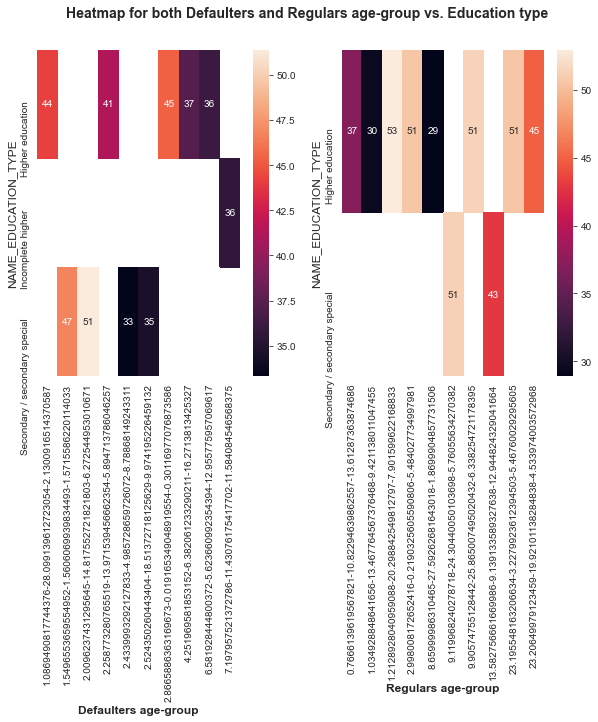

In [80]:
#pivot for top 10 defaulters income range with their education type
age_default_edu=pd.pivot_table(data=c_income_top10_default, index='NAME_EDUCATION_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

#pivot for top 10 regulars income range with their education type
age_regular_edu=pd.pivot_table(data=c_income_top10_regular, index='NAME_EDUCATION_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

# subplots to differentiate both defaulters and regulars average age of different age_group with genre in one cell
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('Heatmap for both Defaulters and Regulars age-group vs. Education type\n', fontsize = 14, fontweight ='bold')
sns.heatmap(age_default_edu, annot=True,ax=ax1)
ax1.set_xlabel(r'Defaulters age-group',fontweight ='bold')
sns.heatmap(age_regular_edu, annot=True,ax=ax2)
ax2.set_xlabel(r'Regulars age-group',fontweight ='bold')
plt.show()

In [81]:
age_default_edu

YEARS_EMPLOYED,1.09,1.55,2.01,2.26,2.43,2.52,2.87,4.25,6.58,7.20
YEARS_REGISTRATION,28.10,1.56,14.82,13.97,4.99,18.51,0.02,6.38,5.62,11.43
YEARS_ID_PUBLISH,2.13,1.57,6.27,5.89,8.79,9.97,0.30,16.27,12.96,11.58
NAME_EDUCATION_TYPE,,,,,,,,,,
Higher education,44.25,nan,nan,41.15,nan,nan,45.35,37.42,36.15,nan
Incomplete higher,nan,nan,nan,nan,nan,nan,nan,nan,nan,35.71
Secondary / secondary special,nan,46.82,51.41,nan,33.33,34.54,nan,nan,nan,nan


#### Age of defaulters with their Education
- The clients who hold higher education status with age more than 35 are defaulters
- The clients who hold seconday/secondary special education with age more than 33 are defaulters

In [82]:
age_regular_edu

YEARS_EMPLOYED,0.77,1.03,1.21,3.00,8.66,9.12,9.91,13.58,23.20,23.21
YEARS_REGISTRATION,10.82,13.47,20.30,0.22,27.59,24.30,25.87,9.14,3.23,19.92
YEARS_ID_PUBLISH,13.61,9.42,7.90,5.48,1.87,5.76,6.34,12.94,5.47,4.53
NAME_EDUCATION_TYPE,,,,,,,,,,
Higher education,37.10,29.51,52.95,50.53,28.95,nan,51.43,nan,50.54,44.97
Secondary / secondary special,nan,nan,nan,nan,nan,51.24,nan,43.00,nan,nan


#### Age of regulars with their Education
- The clients who hold higher education status with age more than 28 and have years employed status higher are regulars
- The clients who hold seconday/secondary special education with age more than 43 and have years employed status higher are regulars

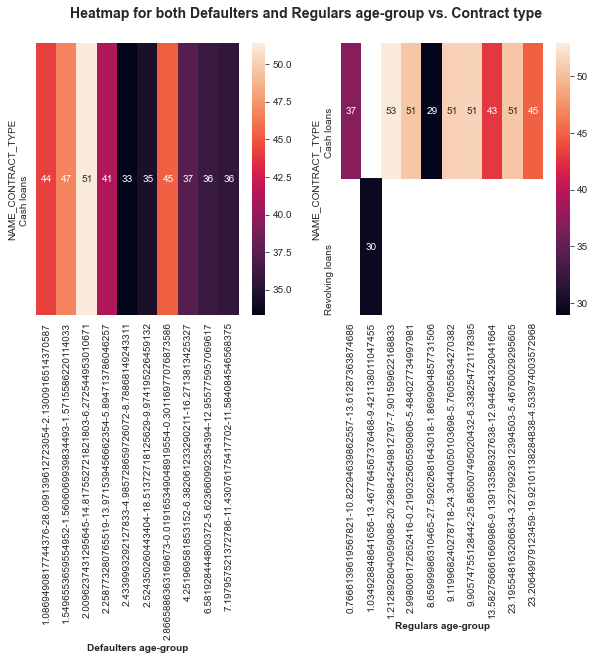

In [76]:
#pivot for top 10 defaulters income range with their contract type
age_default_contract=pd.pivot_table(data=c_income_top10_default, index='NAME_CONTRACT_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

#pivot for top 10 regulars income range with their contract type
age_regular_contract=pd.pivot_table(data=c_income_top10_regular, index='NAME_CONTRACT_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

# subplots to differentiate both defaulters and regulars average age of different age_group with genre in one cell
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Heatmap for both Defaulters and Regulars age-group vs. Contract type\n', fontsize = 14, fontweight ='bold')
sns.heatmap(age_default_contract, annot=True,ax=ax1)
ax1.set_xlabel(r'Defaulters age-group',fontweight ='bold')
sns.heatmap(age_regular_contract, annot=True,ax=ax2)
ax2.set_xlabel(r'Regulars age-group',fontweight ='bold')
plt.show()

In [77]:
age_default_contract

YEARS_EMPLOYED,1.09,1.55,2.01,2.26,2.43,2.52,2.87,4.25,6.58,7.20
YEARS_REGISTRATION,28.10,1.56,14.82,13.97,4.99,18.51,0.02,6.38,5.62,11.43
YEARS_ID_PUBLISH,2.13,1.57,6.27,5.89,8.79,9.97,0.30,16.27,12.96,11.58
NAME_CONTRACT_TYPE,,,,,,,,,,
Cash loans,44.25,46.82,51.41,41.15,33.33,34.54,45.35,37.42,36.15,35.71


#### Age of defaulters with Contract
- The clients who avail cash loans are defaulters in general with age group more than 33, so there is a possibility with repayment delays

In [78]:
age_regular_contract

YEARS_EMPLOYED,0.77,1.03,1.21,3.00,8.66,9.12,9.91,13.58,23.20,23.21
YEARS_REGISTRATION,10.82,13.47,20.30,0.22,27.59,24.30,25.87,9.14,3.23,19.92
YEARS_ID_PUBLISH,13.61,9.42,7.90,5.48,1.87,5.76,6.34,12.94,5.47,4.53
NAME_CONTRACT_TYPE,,,,,,,,,,
Cash loans,37.10,nan,52.95,50.53,28.95,51.24,51.43,43.00,50.54,44.97
Revolving loans,nan,29.51,nan,nan,nan,nan,nan,nan,nan,nan


#### Age of regulars with Contract
- The clients who avail cash loans are regular in general with age group more than 37
- The clients with age less than 30 uses revolving loan and is regular in repayment

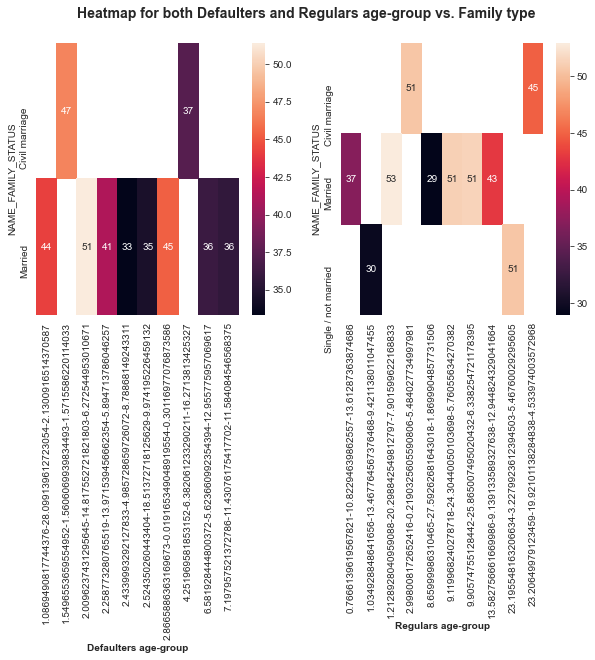

In [79]:
#pivot for top 10 defaulters income range with their family type
age_default_family=pd.pivot_table(data=c_income_top10_default, index='NAME_FAMILY_STATUS', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

#pivot for top 10 regulars income range with their family type
age_regular_family=pd.pivot_table(data=c_income_top10_regular, index='NAME_FAMILY_STATUS', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

# subplots to differentiate both defaulters and regulars average age of different age_group with genre in one cell
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Heatmap for both Defaulters and Regulars age-group vs. Family type\n', fontsize = 14, fontweight ='bold')
sns.heatmap(age_default_family, annot=True,ax=ax1)
ax1.set_xlabel(r'Defaulters age-group',fontweight ='bold')
sns.heatmap(age_regular_family, annot=True,ax=ax2)
ax2.set_xlabel(r'Regulars age-group',fontweight ='bold')
plt.show()

In [80]:
age_default_family

YEARS_EMPLOYED,1.09,1.55,2.01,2.26,2.43,2.52,2.87,4.25,6.58,7.20
YEARS_REGISTRATION,28.10,1.56,14.82,13.97,4.99,18.51,0.02,6.38,5.62,11.43
YEARS_ID_PUBLISH,2.13,1.57,6.27,5.89,8.79,9.97,0.30,16.27,12.96,11.58
NAME_FAMILY_STATUS,,,,,,,,,,
Civil marriage,nan,46.82,nan,nan,nan,nan,nan,37.42,nan,nan
Married,44.25,nan,51.41,41.15,33.33,34.54,45.35,nan,36.15,35.71


#### Age of defaulters with Family
- The clients who got married are defaulters in general with age group more than 33, so there is a possibility with repayment delays due to family dependency
- Civil married clients ranging more than 37 age group are listed as defaulters

In [81]:
age_regular_family

YEARS_EMPLOYED,0.77,1.03,1.21,3.00,8.66,9.12,9.91,13.58,23.20,23.21
YEARS_REGISTRATION,10.82,13.47,20.30,0.22,27.59,24.30,25.87,9.14,3.23,19.92
YEARS_ID_PUBLISH,13.61,9.42,7.90,5.48,1.87,5.76,6.34,12.94,5.47,4.53
NAME_FAMILY_STATUS,,,,,,,,,,
Civil marriage,nan,nan,nan,50.53,nan,nan,nan,nan,nan,44.97
Married,37.10,nan,52.95,nan,28.95,51.24,51.43,43.00,nan,nan
Single / not married,nan,29.51,nan,nan,nan,nan,nan,nan,50.54,nan


#### Age of regulars with Family
- The clients who got married are regulars in general with age group more than 37
- Civil married clients ranging more than 44 age group are listed as regulars

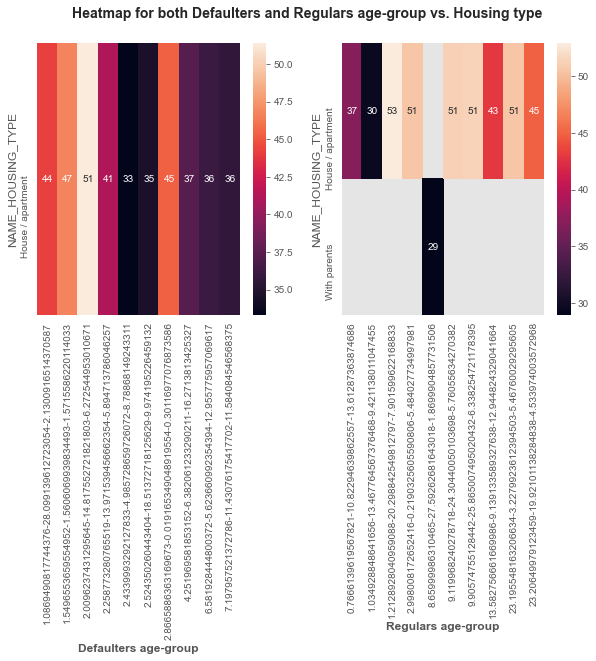

In [97]:
#pivot for top 10 defaulters income range with their housing type
age_default_housing=pd.pivot_table(data=c_income_top10_default, index='NAME_HOUSING_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

#pivot for top 10 regulars income range with their housing type
age_regular_housing=pd.pivot_table(data=c_income_top10_regular, index='NAME_HOUSING_TYPE', columns=['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH'], values='AGE', aggfunc=np.median)

# subplots to differentiate both defaulters and regulars average age of different age_group with genre in one cell
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Heatmap for both Defaulters and Regulars age-group vs. Housing type\n', fontsize = 14, fontweight ='bold')
sns.heatmap(age_default_housing, annot=True,ax=ax1)
ax1.set_xlabel(r'Defaulters age-group',fontweight ='bold')
sns.heatmap(age_regular_housing, annot=True,ax=ax2)
ax2.set_xlabel(r'Regulars age-group',fontweight ='bold')
plt.show()

In [83]:
age_default_housing

YEARS_EMPLOYED,1.09,1.55,2.01,2.26,2.43,2.52,2.87,4.25,6.58,7.20
YEARS_REGISTRATION,28.10,1.56,14.82,13.97,4.99,18.51,0.02,6.38,5.62,11.43
YEARS_ID_PUBLISH,2.13,1.57,6.27,5.89,8.79,9.97,0.30,16.27,12.96,11.58
NAME_HOUSING_TYPE,,,,,,,,,,
House / apartment,44.25,46.82,51.41,41.15,33.33,34.54,45.35,37.42,36.15,35.71


#### Age of defaulters with Housing
- The clients of housing / apartment type with age group more than 33-51 are defaulters

In [84]:
age_regular_housing

YEARS_EMPLOYED,0.77,1.03,1.21,3.00,8.66,9.12,9.91,13.58,23.20,23.21
YEARS_REGISTRATION,10.82,13.47,20.30,0.22,27.59,24.30,25.87,9.14,3.23,19.92
YEARS_ID_PUBLISH,13.61,9.42,7.90,5.48,1.87,5.76,6.34,12.94,5.47,4.53
NAME_HOUSING_TYPE,,,,,,,,,,
House / apartment,37.10,29.51,52.95,50.53,nan,51.24,51.43,43.00,50.54,44.97
With parents,nan,nan,nan,nan,28.95,nan,nan,nan,nan,nan


#### Age of regulars with Housing
- The clients of housing / apartment type with age group more than 37-53 are regulars

### Conclusion

- The overall defaulters application count is lesser and people who have lesser income tend to become defaulters and there are delays in payment. The Bank's exposure looks safe as most of the people are regular payers on time. Defualter will be there in every senarios as not all humans are perfect and prone to emergencies, which might divulge their funds elsewhere. However these defaulter are not willful defaulters, just the ability to pay for that month is weak.

- Females in general have applied for loans more than Males, also females have contributed more towards regular payments as well.
     - There is a drastic difference in regulars count with respect to gender as female applicants are twice as that of the male applications somewhat nearer 2:1 ratio. This shows that females are more reliable to loan out to other than males.
     
- Aging influences people with various factors as most of the case study revolves around the age group between 35-50 years for most cases in both Regulars and Defaulters. This might be as people would have started their families in early 30's and the expenses keep on piling up and with inflation on the rise, the capita per income looks weak due to which most families are in need of apply for a credit for overhead expenses.

- Some exceptions with defaulters with outliers where there are people who yeild high income but these people should be businessmen who invest their earnings in other sources and that may lead to delay payment time. As lending to businesses are risky in general, lending to businessmen is more of a 'High Risk, High Reward' factor associated with it.

- When there is dependency with family and realty the people are more prone to be regulars and people who are independent are defaulters. People tend to look after what's really important to them and are less likely to take risks with their credit since they have multiple mouths to feed incase something goes wrong however its quite opposite with independents as they to only to look over themselves, the risk factor increases as they need to feed just one mouth.

- Increase in age shows that most of the regulars fall in this incremental category. Pople get more wiser and less wreckless as age gets the better of them and due to multiple responsiblity, they are good and stable payers.

- In Regulars the clients who own an appartment/flat are most likely to earn well and they fall under the category of Regulars due to the documents of REALTY they would have submitted during loan application also Regulars are majority in numbers

- The people who got loan credit of 3.5 lakh to 5.6 lakh turns out to be defaulters as they might be students who are still studying or even looking for job. Clients who avail cash loans are defaulters in general with age group greater than 33 years, so there is a possibility with repayment delays


### Suggestions

- Banks should focus more on Females with steady and regular income.
- Businessmen should be evaluated well with their Financial Statements over the past 3 years, to get a better idea of their business and their profit margins.
- Banks should back applicants that are Home Owners Vs Rented Houses. Applicants with 1 child or living with parents should be targeted more often as they tend to be more reliable payers.
- Banks should avail credit to apllicants with Higher Education and Years of Employment status on a higher side who are 28 years and above. Also, applicants who hold Secondary/Secondary Special Education with Years of Employment higher who are 43 years and above. 
- Banks should focus more on Comsumer Loans as compared to Cash Loans as they are more defaulted in most cases.
- Banks should be catious while giing out small and medium size loans to Students with Irregular Income as they are still exploring options for Job oppurtunities due to which they might default more.